In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns='Id')

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.0741 - accuracy: 0.6095
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.6190
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0200 - accuracy: 0.7905
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.7905
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9714 - accuracy: 0.7238
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9458 - accuracy: 0.7143
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9174 - accuracy: 0.7524
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.7333
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8567 - accuracy: 0.7714
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.8190
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0840 - accuracy: 0.9778


[0.08402471244335175, 0.9777777791023254]

In [ ]:
import matplotlib.pyplot as plt

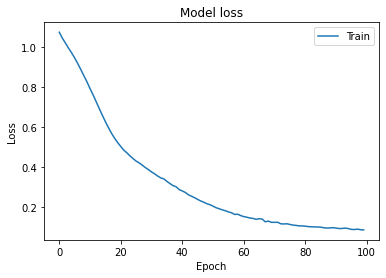

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

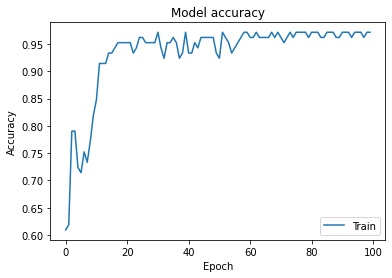

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [20]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [22]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1370 - accuracy: 0.4286
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.6095
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.6857
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9394 - accuracy: 0.6857
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.6857
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.6857
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.6857
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.6857
Epoch 11/50
4/4 [======================

In [23]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [24]:
mnist = tf.keras.datasets.mnist

In [25]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


5


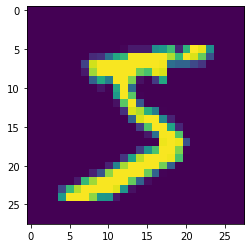

In [26]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [27]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [28]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1123 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9864


In [31]:
model.fit(gambar_latih, label_latih, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9933
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.9954
